In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import discriminant_analysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [51]:
df = pd.read_csv('Data/alzheimers_disease_data.csv')

In [52]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [53]:
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [54]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [55]:
df = pd.get_dummies(df, columns=['Ethnicity', 'EducationLevel'])

In [56]:
df.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
0,73,0,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,...,0,0,1,0,0,0,0,0,1,0
1,89,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,...,1,0,1,0,0,0,1,0,0,0
2,73,0,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,...,0,0,0,0,0,1,0,1,0,0
3,74,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,...,0,0,1,0,0,0,0,1,0,0
4,89,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,...,0,0,1,0,0,0,1,0,0,0


In [57]:
target= 'Diagnosis'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model= linear_model.LogisticRegression().fit(X_train, y_train)

probabilidades_modelo1 = model.predict_proba(X_test)[:, 1]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:

probas = model.predict_proba(X_test)

probabilidades = [i[1] for i in probas]
predicciones = model.predict(X_test)



def calibracion(probabilidades, y, bins):
    df_calibracion = pd.DataFrame({
        'probabilidades':probabilidades,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['probabilidades'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()

    plt.plot(grouped.probabilidades, grouped.y, label="Modelo", marker="o")
    plt.plot(grouped.probabilidades, grouped.probabilidades, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("probabilidades")
    plt.ylabel("Real")

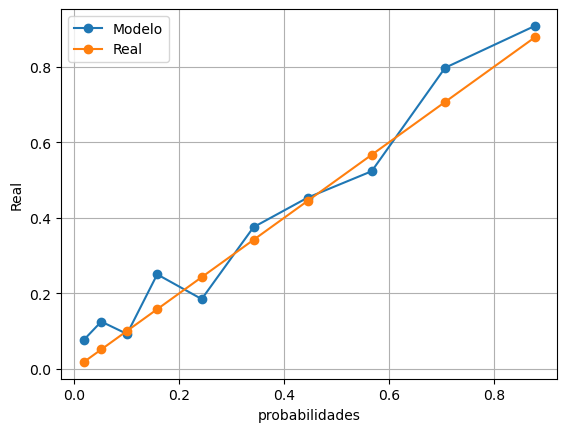

In [59]:
calibracion(probabilidades, y_test, 10)

In [60]:
coeficientes = pd.DataFrame({
    'features': X.keys(),
    'coeficiente': model.coef_[0]
})
coeficientes

,features,coeficiente
0,Age,0.017198
1,Gender,0.134709
2,BMI,-0.018805
3,Smoking,-0.017405
4,AlcoholConsumption,-0.041112
5,PhysicalActivity,-0.029838
6,DietQuality,0.068912
7,SleepQuality,-0.095315
8,FamilyHistoryAlzheimers,-0.023929
9,CardiovascularDisease,0.066169


In [61]:
pipeline = Pipeline([
    ("scaler",  StandardScaler()),
    ("poly_features", PolynomialFeatures(degree=2)),
    ("model", linear_model.LogisticRegression(penalty = 'l2'))
])

pipeline.fit(X_train, y_train)

probabilidades_modelo2 = pipeline.predict_proba(X_test)[:, 1]

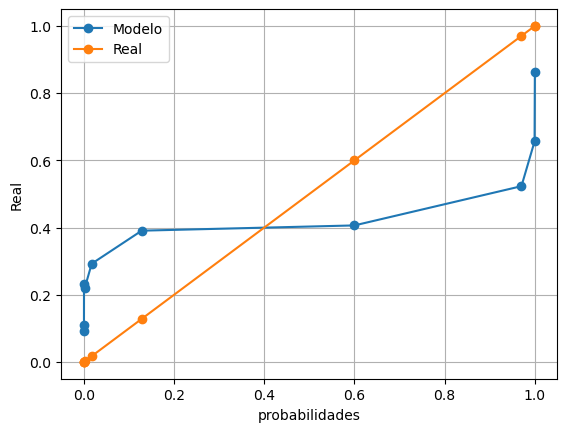

In [62]:
calibracion(probabilidades_modelo2, y_test, 10)

In [63]:
pipeline = Pipeline([
    ("scaler",  StandardScaler()),
    ("poly_features", PolynomialFeatures(degree=3)),
    ("model", linear_model.LogisticRegression(penalty = 'l2'))
])

pipeline.fit(X_train, y_train)

probabilidades_modelo3 = pipeline.predict_proba(X_test)[:, 1]

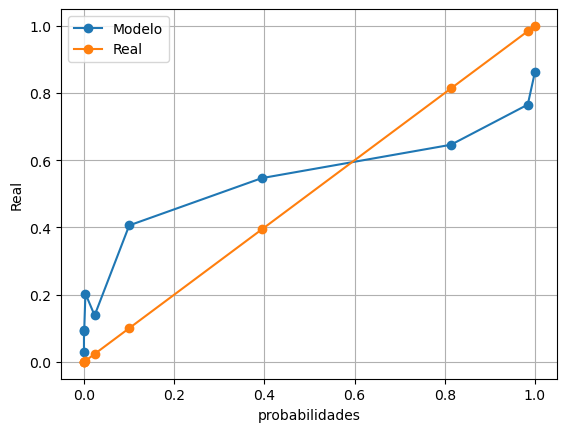

In [64]:
calibracion(probabilidades_modelo3, y_test, 10)

# Analisis del discriminante lineal

In [65]:
pipeline = Pipeline([
    ("scaler",  StandardScaler()),
    ("model", discriminant_analysis.LinearDiscriminantAnalysis())
])

pipeline.fit(X_train, y_train)

probabilidades_modelo_disc = pipeline.predict_proba(X_test)[:, 1]

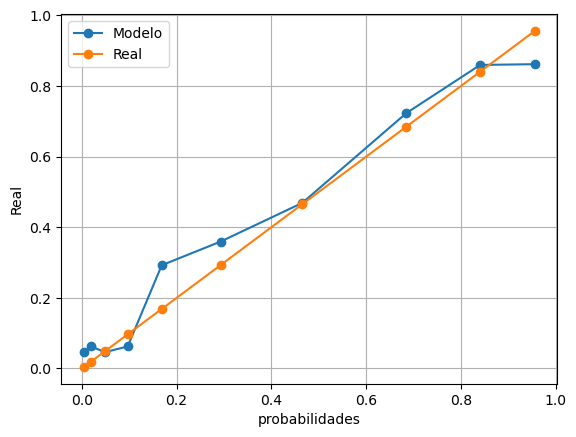

In [66]:
calibracion(probabilidades_modelo_disc, y_test, 10)

In [67]:
juntar = pd.DataFrame({
    'real': y_test,
    'logistica1': probabilidades_modelo1,
    'logistica2': probabilidades_modelo2,
    'logistica3' : probabilidades_modelo3,
    'probabilidades_disc' : probabilidades_modelo_disc
})
juntar.head()

,real,logistica1,logistica2,logistica3,probabilidades_disc
1159,0,0.059505,5.366521e-12,3.892839e-07,0.013735
1822,0,0.475627,6.732656e-06,3.066921e-02,0.153149
978,0,0.124094,3.920769e-01,1.371309e-01,0.159469
759,0,0.351055,2.267312e-05,6.655720e-06,0.078635
874,0,0.004859,2.225047e-11,1.449967e-09,0.001993


# Histograma Regresion Logistica

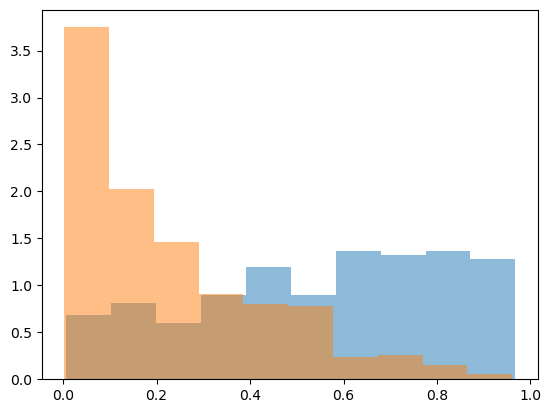

In [68]:
plt.hist(juntar[juntar['real']==1]['logistica1'], density=True, alpha=0.5)
plt.hist(juntar[juntar['real']==0]['logistica1'], density=True, alpha=0.5)
plt.show()

# Histograma Polinomial 2

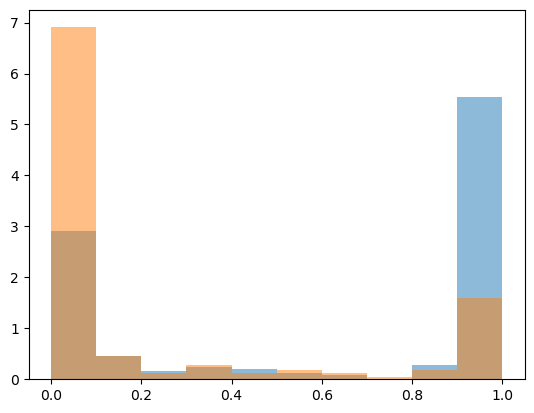

In [69]:
plt.hist(juntar[juntar['real']==1]['logistica2'], density=True, alpha=0.5)
plt.hist(juntar[juntar['real']==0]['logistica2'], density=True, alpha=0.5)
plt.show()

# Histograma polinomial 3

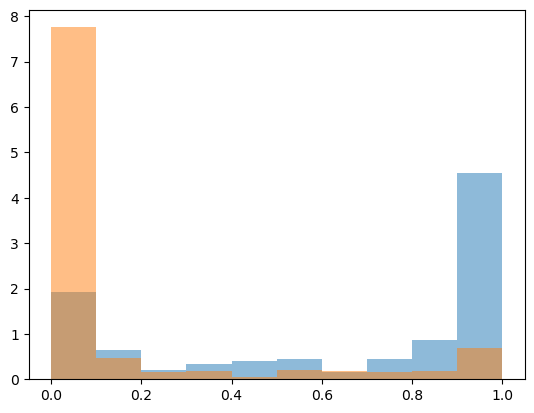

In [70]:
plt.hist(juntar[juntar['real']==1]['logistica3'], density=True, alpha=0.5)
plt.hist(juntar[juntar['real']==0]['logistica3'], density=True, alpha=0.5)
plt.show()

# Histograma Discriminacion Lineal

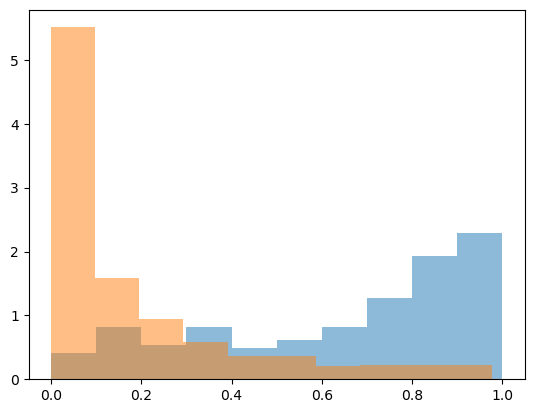

In [71]:
plt.hist(juntar[juntar['real']==1]['probabilidades_disc'], density=True, alpha=0.5)
plt.hist(juntar[juntar['real']==0]['probabilidades_disc'], density=True, alpha=0.5)
plt.show()

In [72]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo1, y_true=y_test)

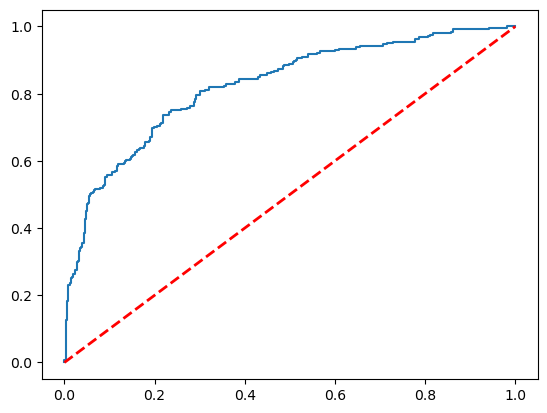

In [73]:
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

In [74]:
roc_auc_score(y_score=probabilidades_modelo1, y_true=y_test)

0.8232696946159191

In [75]:
2*roc_auc_score(y_score=probabilidades_modelo1, y_true=y_test) - 1

0.6465393892318383

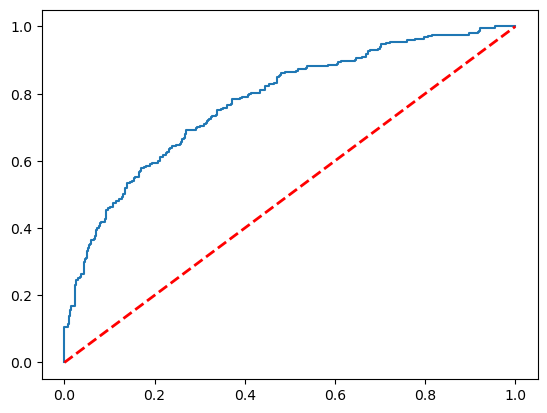

In [76]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo2, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

In [77]:
roc_auc_score(y_score=probabilidades_modelo2, y_true=y_test)

0.7774416417971464

In [78]:
2*roc_auc_score(y_score=probabilidades_modelo2, y_true=y_test) - 1

0.5548832835942927

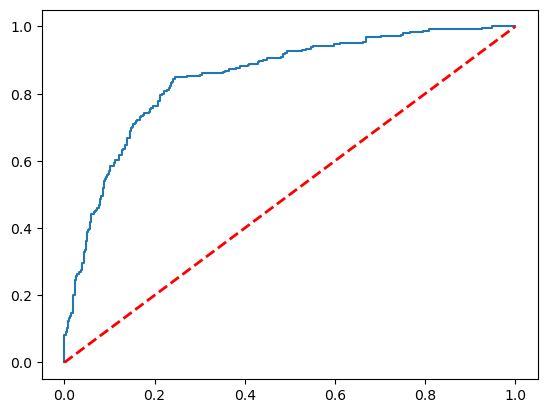

In [79]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo3, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

In [80]:
roc_auc_score(y_score=probabilidades_modelo3, y_true=y_test)

0.8480336045133069

In [81]:
2*roc_auc_score(y_score=probabilidades_modelo3, y_true=y_test) - 1

0.6960672090266138

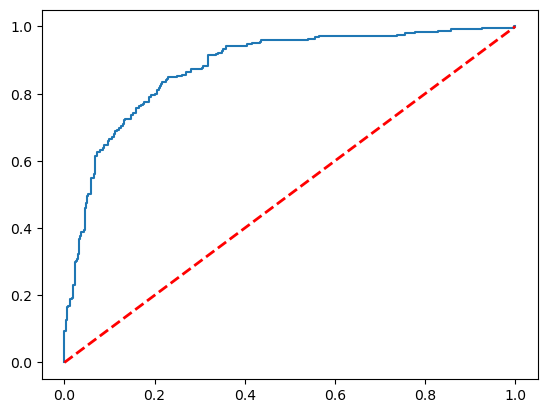

In [89]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo_disc, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

In [90]:
roc_auc_score(y_score=probabilidades_modelo_disc, y_true=y_test)

0.8795327255631412

In [91]:
2*roc_auc_score(y_score=probabilidades_modelo_disc, y_true=y_test) - 1

0.7590654511262824

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
vecinos = []
auc = []

for i in range(1, 100):
    model=neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
    probabilidadesknn = model.predict_proba(X_test_scaled)[:,1]
    vecinos.append(i)
    auc.append(roc_auc_score(y_score=probabilidadesknn, y_true=y_test))

In [100]:
resultados = pd.DataFrame({
    'auc':auc,
    'vecinos':vecinos
})

In [95]:
vecinos_optimos = resultados[resultados.auc == max(resultados.auc)].vecinos.values[0]
vecinos_optimos

99

In [97]:
model=neighbors.KNeighborsClassifier(n_neighbors=99).fit(X_train_scaled, y_train)
probabilidadesknn = model.predict_proba(X_test_scaled)[:,1]

In [101]:
roc_auc_score(y_score=probabilidadesknn, y_true=y_test)

0.8574056661624627

In [102]:
2*roc_auc_score(y_score=probabilidadesknn, y_true=y_test) - 1

0.7148113323249254

# Conclusiones

Haciendo los modelos de regresion logistica, polinomial 2, polinomial 3, discriminante lineal y KNN, se puede concluir que el mejor modelo es el de discriminante lineal ya que nos da un auc de 0.8795 lo que nos dice que hay un 87.95% de probabilidad de que una persona que tiene alzheimer tenga una predicción mayor que alguien que no. 

Haciendo KNN obtenemos que los vecinos optimos en este caso es de 99, utilizando este numero de vecinos para sacar el auc da 0.8574, que es menor al auc del discriminante lineal.